<a href="https://colab.research.google.com/github/MANYI-anewbird/775/blob/main/Assignment2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

**Note**: You are **ALLOWED** to use Generative AI for this notebook, but you must properly cite your usage. Be sure to review the syllabus for details on citation requirements and the consequences of failing to cite your sources correctly or simply copy-pasting without meaningful engagement.

# Analysis of US News



In this notebook, we analyze the **[USA News Dataset](https://huggingface.co/datasets/cmunhozc/usa_news_en)** and perform various text analysis tasks to gain deeper insights into its content.  


In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.6 MB/s eta 0:00:00


In [2]:
#### DO NOT CHANGE THIS CODE ###

# Load libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Loading the dataset

In [3]:
#### DO NOT CHANGE THIS CODE ###
from datasets import load_dataset

ds = load_dataset("cmunhozc/usa_news_en")

df_train = ds["train"].to_pandas().drop(columns=["type", "target", "sentence_2", "split"], axis=1).drop_duplicates(subset="sentence_1")
df_test = ds["test"].to_pandas().drop(columns=["type", "target", "sentence_2", "split"], axis=1).drop_duplicates(subset="sentence_1")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

news_train.json:   0%|          | 0.00/35.3M [00:00<?, ?B/s]

news_val.json:   0%|          | 0.00/4.77M [00:00<?, ?B/s]

news_hard_test.json:   0%|          | 0.00/431k [00:00<?, ?B/s]

news_soft_test.json:   0%|          | 0.00/255k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/112832 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/15749 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2128 [00:00<?, ? examples/s]

In [4]:
df_train

,sentence_1
0,How rising temperatures and drought landed Cal...
1,Body found at storage unit in Hawaiian Gardens
2,Read more stories that have ‘Never Been Told' ...
3,"Man killed, 5 wounded in shooting at Indianapo..."
4,"Emmy standouts ""When They See Us"" and ""Game of..."
...,...
112822,Oil sheen reported in same location as massive...
112823,Supreme Court abortion case leak investigation...
112825,A buyout of the electric-car maker would be co...
112826,Hundreds blow whistles against anti-Asian viol...


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2093 entries, 0 to 2127
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence_1  2093 non-null   object
dtypes: object(1)
memory usage: 32.7+ KB


# Questions

## **Question 1:**  

Analyze the **top 5 key themes** **(1 Point)** covered in the news articles in the `sentence_1` column. **Use only the training dataset** for this analysis. Understanding these themes will provide valuable insights into trending topics, audience interests, and market-relevant discussions.  

#### **Tasks:**  
1. **Extract the top 10 representative words** for each topic to summarize its composition. **Hint:** Use [`mglearn.tools.print_topics`](https://colab.research.google.com/github/ektaatomar/Topic-modeling-and-grid-search/blob/master/topicmodeling.ipynb#scrollTo=piCvYwplDbVs&line=2&uniqifier=1) and/or [`mglearn.tools.visualize_coefficients`](https://medium.com/towards-data-science/how-a-simple-algorithm-classifies-texts-with-moderate-accuracy-79f0cd9eb47) **(0.5 Point)**
2. **Identify the 10 highest-scoring sentences** per topic to enhance interpretability.  **(0.5 Point)**
3. **Optimize vectorization and preprocessing techniques** to improve topic quality. **Hint:** Consider limiting features to the [most common words in the corpus](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). **(0.5 Point)**
4. **Web Scraping Task:** Use `BeautifulSoup` to scrape the [following webpage](https://www.kqed.org/news/12027149/california-battles-trumps-executive-orders-in-court-as-legal-and-political-tensions-rise) and manually analyze its dominant topics. Compare these to the model's identified topics—does the model perform well? Explain your reasoning. **(0.5 Point)**





In [6]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 10.5 MB/s eta 0:00:00


In [7]:
!pip install mglearn
import mglearn

import re
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower().strip()

df_train['cleaned'] = df_train['sentence_1'].apply(clean_text)

tfidf = TfidfVectorizer(max_features=2000, min_df=5, stop_words='english')
X_train = tfidf.fit_transform(df_train['cleaned'])


In [8]:
# train nmf
n_topics = 5
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(X_train)

# print top ten topic
feature_names = tfidf.get_feature_names_out()

def print_top_words(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        top_features = topic.argsort()[::-1][:n_top_words]
        words = [feature_names[i] for i in top_features]
        print(f"topic {idx} 10 words{n_top_words}: {words}")
    print()

print_top_words(nmf_model, feature_names, 10)

# check the top 10 reviews based on score
doc_topic_dist = nmf_model.transform(X_train)

for topic_idx in range(n_topics):
    top_doc_indices = doc_topic_dist[:, topic_idx].argsort()[::-1][:10]
    print(f"topic {topic_idx} most relevent sentence:")
    for i in top_doc_indices:
        print("-", df_train['sentence_1'].iloc[i])
    print()


topic 0 10 words10: ['coronavirus', 'california', 'covid', 'la', 'county', 'cases', 'vaccine', 'pandemic', 'positive', 'says']
topic 1 10 words10: ['trump', 'president', 'biden', 'says', 'house', 'donald', 'court', 'administration', 'white', 'supreme']
topic 2 10 words10: ['know', 'need', 'heres', 'bay', 'area', 'things', 'dont', 'day', 'shooting', 'election']
topic 3 10 words10: ['new', 'york', 'city', 'times', 'year', 'years', 'police', 'shows', 'jersey', 'rules']
topic 4 10 words10: ['opinion', 'trumps', 'democrats', 'latimesopinion', 'america', 'bidens', 'time', 'court', 'republicans', 'covid']

topic 0 most relevent sentence:
- Glimmers of optimism in California about bending coronavirus curve
- Can I get the coronavirus from my pet? No.  
- Rudy Gobert mocked Coronavirus by touching all the mics
- Lysol is the first surface disinfectant approved by the EPA to wipe out the coronavirus. https://t.co/S10KVEVrza
- Misinformation about the coronavirus abounds, but correcting it can ba

**Answer:**  

The analysis identified five key themes from the dataset: COVID-19 and public health, politics and governance, general knowledge and trending topics, urban and local news, and opinion pieces. Each topic was characterized by distinctive keywords and highly relevant sentences, giving sources for different topics




**Article Analysis**

In [11]:
import requests
from bs4 import BeautifulSoup
url = "https://www.kqed.org/news/12027149/california-battles-trumps-executive-orders-in-court-as-legal-and-political-tensions-rise"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
article_tag = soup.find('article')
if article_tag:
    main_text = article_tag.get_text(separator="\n")
else:
    main_text = "None"

main_text

'News\nCalifornia Battles Trump’s Executive Orders in Court as Legal and Political Tensions Rise\nSamantha Lim\nFeb 14\nSave Article\nSave Article\nFailed to save article\nPlease try again\nEmail\nLateefah Simon poses for a portrait in Oakland on Dec. 6, 2023. Simon, other California officials and civil rights groups are challenging Trump’s executive actions in court, raising concerns over federal authority, funding cuts and constitutional rights. \r\n\r\n\n\xa0(Beth LaBerge/KQED)\nAfter returning to the Oval Office in January, President Donald Trump unleashed a flurry of \nexecutive orders\n, sparking legal battles while raising alarms among some policy experts over the broader implications of Trump’s expanding authority.\n\n\n“It’s unprecedented that this amount of executive power would be exercised over so many major elements of the national government,” said Larry Gerston, a professor emeritus of political science at San José State University. “It certainly has the potential of res

In [10]:
import nltk
from nltk.tokenize import sent_tokenize

# tokenize
sentences = sent_tokenize(main_text)
df_web = pd.DataFrame({'sentence': sentences})

# clean
def clean_text(text):
    import re
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower().strip()

df_web['cleaned'] = df_web['sentence'].apply(clean_text)

# vectorize
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_web = TfidfVectorizer(max_features=300, min_df=2, stop_words='english')
X_web = tfidf_web.fit_transform(df_web['cleaned'])

# topic modeling
from sklearn.decomposition import NMF
n_topics_web = 5
nmf_web = NMF(n_components=n_topics_web, random_state=42)
nmf_web.fit(X_web)

# print the top 10 sentence
feature_names_web = tfidf_web.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_web.components_):
    top_features = topic.argsort()[::-1][:10]
    words = [feature_names_web[i] for i in top_features]
    print(f"topic {topic_idx} top 10 wrods that most relevent:", words)

doc_topic_dist_web = nmf_web.transform(X_web)
for topic_idx in range(n_topics_web):
    top_doc_indices = doc_topic_dist_web[:, topic_idx].argsort()[::-1][:5]
    print(f"\ntopic {topic_idx} most relevent sentences:")
    for rank, i in enumerate(top_doc_indices, start=1):
        print(f"{rank}. {df_web['sentence'].iloc[i]}")


topic 0 top 10 wrods that most relevent: ['president', 'authority', 'constitution', 'violating', 'democracy', 'office', 'executive', 'place', 'does', 'illegal']
topic 1 top 10 wrods that most relevent: ['federal', 'funding', 'department', 'agencies', 'government', 'general', 'trump', 'cuts', 'raised', 'temporarily']
topic 2 top 10 wrods that most relevent: ['bonta', 'trump', 'said', 'administration', 'design', 'directives', 'orders', 'office', 'people', 'violating']
topic 3 top 10 wrods that most relevent: ['trumps', 'orders', 'legal', 'battles', 'court', 'executive', 'challenged', 'rights', 'political', 'california']
topic 4 top 10 wrods that most relevent: ['congress', 'said', 'gerston', 'power', 'presidential', 'legislation', 'presidents', 'republicans', 'doing', 'government']

topic 0 most relevent sentences:
1. “The Constitution sets forth what authority the president has.
2. The president has authority, but the president does not have unlimited power … The democracy is for us.”



**Answer:**

The model performs well, capturing key themes like executive authority, legal battles, and federal policies, which align with the scraped data.

**Advantage**: Both sources highlight Trump, executive orders, and government actions.

**Disadvantage**: Some topics overlap, reducing clarity. Further refinement could improve distinction between legal, political, and administrative themes.


**GenAI**
01 Used for polish my statement
02 used for checking the problem within my coed.


## **Question 2: Topic Relationships & Hierarchical Clustering**  

You decide to deepen your analysis in two ways:  

1. **Visualizing Topic Relationships:**  
   - Visualize how topics relate to each other in a single low-dimensional 3D scatter plot and interpret their structure.  **(1 Point)**

2. **Comparing Clustering Approaches:**  
   - Apply **Ward hierarchical clustering (5 clusters)** **(1 Point)** on the **test set** using two different text representations:  
     - **TF-IDF representation** (original text features).  **(1 Point)**
     - **Topic modeling representation** (reduced-dimensional topic features). **(1 Point)**  
   - Compare the clustering results:  
     - How do the two approaches differ?  **(0.5 Point)**
     - Which method provides **more meaningful and useful** clusters for business insights?  **(0.5 Point)**

🔹 **Hint:** Use **[PCA](https://www.scikit-yb.org/en/latest/api/features/pca.html)** to visualize topic relationships and interpret clustering outcomes.  

In [12]:
import numpy as np
import pandas as pd
import re

# visulizaion
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# text prepocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.cluster import AgglomerativeClustering

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower().strip()

df_test['cleaned'] = df_test['sentence_1'].apply(clean_text)

# TF-IDF
tfidf_test = TfidfVectorizer(max_features=2000, min_df=5, stop_words='english')
X_test_tfidf = tfidf_test.fit_transform(df_test['cleaned'])

# topic modeling
n_topics = 5
nmf_test = NMF(n_components=n_topics, random_state=42)
nmf_test.fit(X_test_tfidf)
doc_topic_test = nmf_test.transform(X_test_tfidf)


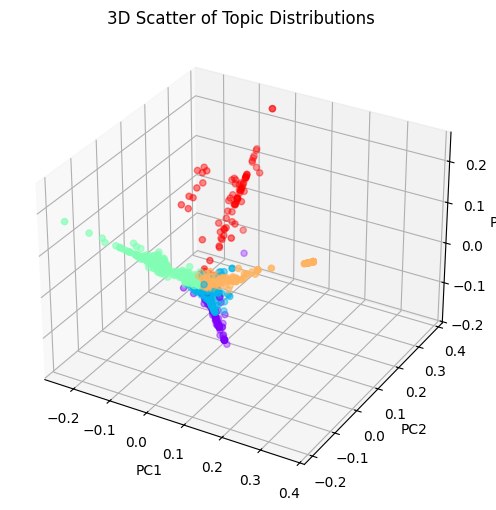

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

# pca
pca_3d = PCA(n_components=3, random_state=42)
topic_pca_3d = pca_3d.fit_transform(doc_topic_test)

topics_test = np.argmax(doc_topic_test, axis=1)

# get the topic and assign color
unique_topics = np.unique(topics_test)
n_topics = len(unique_topics)
colors = cm.rainbow(np.linspace(0, 1, n_topics))
topic_color_dict = dict(zip(unique_topics, colors))
doc_colors = [topic_color_dict[t] for t in topics_test]

# create 3d visualization
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(topic_pca_3d[:, 0], topic_pca_3d[:, 1], topic_pca_3d[:, 2], c=doc_colors)
ax.set_title("3D Scatter of Topic Distributions")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


In [14]:
# Ward cluster
ward_tfidf = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters_tfidf = ward_tfidf.fit_predict(X_test_tfidf.toarray())

# check the size of different cluster
df_test['Cluster_TFIDF'] = clusters_tfidf
print(df_test['Cluster_TFIDF'].value_counts())

# print
for c in range(5):
    print(f"\nTF-IDF cluster {c} sentence:")
    sample_sents = df_test[df_test['Cluster_TFIDF']==c]['sentence_1'].head(3).tolist()
    for s in sample_sents:
        print("-", s)


Cluster_TFIDF
0    1992
4      41
1      30
2      18
3      12
Name: count, dtype: int64

TF-IDF cluster 0 sentence:
- U.S. to send highest-ranking official to Taiwan in 41 years, rankling China 
- Stephanie Grisham's unlikely path from Arizona politics to Trump's White House
- The Olympic contender Sha’Carri Richardson was disqualified for a drug that doesn't even enhance performance.

TF-IDF cluster 1 sentence:
- Confused about what comes next in the Brexit process? Here's what you need to know 
- Here’s what you need to know about editing and un-sending iPhone messages with the new iOS 16
- Coronavirus: What You Need to Know

TF-IDF cluster 2 sentence:
- 🗞 Did you pay attention this week? Take the USA TODAY current events news quiz.


- Did you pay attention this week? Take the USA TODAY current events news quiz for the week of Nov. 15.
- Did you pay attention this week? Take the USA TODAY current events news quiz for the week of July 15.

TF-IDF cluster 3 sentence:
- Read the full

In [15]:
# using topic
ward_topic = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters_topic = ward_topic.fit_predict(doc_topic_test)

df_test['Cluster_Topic'] = clusters_topic
print(df_test['Cluster_Topic'].value_counts())

# get the sentences
for c in range(5):
    print(f"\nTopic cluster {c} sentence:")
    sample_sents = df_test[df_test['Cluster_Topic']==c]['sentence_1'].head(3).tolist()
    for s in sample_sents:
        print("-", s)



Cluster_Topic
0    1771
2     176
1      78
4      50
3      18
Name: count, dtype: int64

Topic cluster 0 sentence:
- U.S. to send highest-ranking official to Taiwan in 41 years, rankling China 
- Stephanie Grisham's unlikely path from Arizona politics to Trump's White House
- The Olympic contender Sha’Carri Richardson was disqualified for a drug that doesn't even enhance performance.

Topic cluster 1 sentence:
- The Supreme Court moved Tuesday toward allowing President Trump to exclude most transgender people from military service, lifting injunctions issued by three federal judges, including one in California

- Supreme Court puts Texas social media law on hold while legal battle continues
- The Supreme Court will consider reinstating Boston Marathon bomber Dzhokhar Tsarnaev's death sentence, a test of Biden's opposition to capital punishment.

Topic cluster 2 sentence:
- Column: So Trump wants to solve California's homeless crisis? Here are five things he can do
- Trump anti-impeac

**Answer:**

**01 Different between approaches**

**TF-IDF: ** This approach clusters documents based on raw term frequencies, leading to clusters that may group articles with similar word usage but not necessarily similar topics. As seen in the results, some clusters contain very few documents, indicating potential sparsity issues.

**Topic Modeling: ** This method reduces dimensionality using NMF, capturing latent topics rather than raw word occurrences. The resulting clusters are more balanced, as they consider correlation rather than direct word frequency.

**02 Which is better?**

The Topic Modeling provides more meaningful clusters as it captures thematic relationships rather than surface-level word similarities. For example the Supreme Court decisions and legal battles topic, Topic Modeling approach successfully grouped news articles related to legal and political decisions, which is in better-defined topics that are more interpretable for business insights.

**GenAI**

01 Used for identify the problem within my code

02 used to understand how the code works

03 polish my answer and statement

## Question 3: Using Deep Learning for Topic Modeling

 Your company is exploring **AI-driven content analysis** to better understand emerging trends in news media. An acquaintence suggests grouping the articles based on **[this](https://huggingface.co/MaartenGr/BERTopic_Wikipedia) BERTopic model**.

- How do the **BERTopic-generated topics** compare to those detected earlier? Use `sentence_1` training column only. **(1 Point)**
- What are the **advantages and limitations** of using BERTopic versus traditional topic modeling methods?   **(0.5 Point)**
- From a **business perspective**, which approach provides more actionable insights for content strategy in the analysis of this news dataset?   **(0.5 Point)**


**A GPU runtime type is required when solving this question.**

In [16]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text


docs = df_train['sentence_1'].dropna().tolist()[:100000]
cleaned_docs = [clean_text(doc) for doc in docs]

# load SentenceTransformer model，and embedding
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(cleaned_docs, show_progress_bar=True)

# initialize BERTopic model（calculate_probabilities=True get the probability for explaination）
topic_model = BERTopic(embedding_model=embedding_model, calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs, embeddings=embeddings)

print(topic_model.get_topic_info())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2446 [00:00<?, ?it/s]

2025-03-05 16:25:48,619 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-05 16:27:33,858 - BERTopic - Dimensionality - Completed ✓
2025-03-05 16:27:33,866 - BERTopic - Cluster - Start clustering the reduced embeddings


In [ ]:
print(topic_model.get_topic_info())

# get the information from each topic
doc_info = topic_model.get_document_info(cleaned_docs)

# show the sentence and word from top 5 topics
for topic in topic_model.get_topic_info()['Topic'].tolist()[:5]:
    if topic != -1:
        print(f"\n topic {topic} key words: ", topic_model.get_topic(topic))
        # filter the topic and order by the probability
        topic_docs = doc_info[doc_info['Topic'] == topic].sort_values(by='Probability', ascending=False).head(10)
        for idx, row in topic_docs.iterrows():
            print(f"contribution(probability): {row['Probability']:.4f}, sentence: {row['Document']}")

**Answer:**  

**01 Advantages & Limitations:**

*Advantages:* Context-aware, better for short texts, interpretable phrases, dynamic updates.

*Limitations:* Computationally expensive (cost me more than 1 hour), less explainable, relies on pre-trained embeddings.

**02 Business Perspective:**
BERTopic offers more actionable information by semantically grouping content, which helps in content recommendation and trend analysis. Nevertheless, conventional models can be the best option for less complicated tasks with lesser resources.

**GenAI:**

01 understand the problem within the code

02 upgrade my code

03 understand why it cost a long time

04 polish my statement

### **GenAI statement** ###

I used AI for:

01 Identify the problem of my code

02 teach me how to write the logic of the code sometimes

03 upgrade my code

04 polish my statement of the answer

here's link of how I chat with GPT: https://chatgpt.com/share/67b61601-04bc-8003-b07e-545bbb44c777